# Importing required libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Read the dataset

In [98]:
data = pd.read_csv('results.csv')
data.head

<bound method NDFrame.head of                                                  title  \
0    1390 Sft (East Facing),New 2 Bhk Flat for sale...   
1    Luxury Villa (2100sq ft  in 5cents) for sale i...   
2                                          Argent sell   
3                          2BHK FLAT NEAR AIRPORT ROAD   
4        1BHK FLAT NEAR AIRPORT ROAD SECTOR 127 MOHALI   
..                                                 ...   
995                                      Flat for sale   
996       4CENT KAKKANAD KIZHAKKAMBALAM 3BHK NEW HOUSE   
997  3BHK House with 10.74 cent plot for sale; Stat...   
998  1922 sq.ft, 3 BHK partial water view luxury ap...   
999  House near yog sr sec school 12 quarter road h...   

                                           description     location  \
0    New apartment for sale in Vadavalli.  Built up...   Tamil Nadu   
1    A newly built (under construction) luxury mode...       Kerala   
2                                  All documents clear  Maha

# Getting idea about the dataset

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1000 non-null   object
 1   description  1000 non-null   object
 2   location     1000 non-null   object
 3   City         1000 non-null   object
 4   features     983 non-null    object
 5   date         1000 non-null   object
 6   price        1000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


# Checking for null values

In [100]:
data.isnull().sum()

title           0
description     0
location        0
City            0
features       17
date            0
price           0
dtype: int64

# Removing null values

In [101]:
data.dropna(inplace=True, axis = 0)

In [102]:
data.isnull().sum()

title          0
description    0
location       0
City           0
features       0
date           0
price          0
dtype: int64

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        983 non-null    object
 1   description  983 non-null    object
 2   location     983 non-null    object
 3   City         983 non-null    object
 4   features     983 non-null    object
 5   date         983 non-null    object
 6   price        983 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 61.4+ KB


# Getting unique values of the columns

In [163]:
data['City'].unique()

array(['Coimbatore', 'Thrissur', 'Nagpur', 'Kharar', 'Jalandhar',
       'Jaipur', 'Aluva', 'Pune', 'Mohali', 'Ahmedabad', 'Thane',
       'Greater Noida', 'Kochi', 'Indore', 'Kolhapur', 'Ludhiana',
       'Sidhpur', 'Thiruvananthapuram', 'Lucknow', 'Kolkata',
       'Kodungallur', 'Raipur', 'Choornikkara', 'Puruliya',
       'Chandannagar M.C.', 'Gurgaon', 'Nellore', 'Delhi', 'Ghaziabad',
       'Chennai', 'Hisar', 'Nashik', 'Dehradun', 'Hyderabad', 'Kota',
       'Kozhikode', 'Vadodara', 'Faridabad', 'Mumbai', 'Panchkula',
       'Hooghly', 'Roorkee', 'Chevvoor', 'Allahabad', 'Vaikom', 'Patiala',
       'Navi Mumbai', 'Bareilly', 'Zirakpur', 'Salem', 'Haldwani',
       'Mysuru', 'Periyanaickenpalayam', 'Puranattukara', 'Kannur',
       'Jodhpur', 'Siliguri', 'Kakinada', 'Durgapur', 'Eluru', 'Sulluru',
       'Guwahati', 'Palakkad', 'Valsad', 'Malkajgiri', 'Vijayawada',
       'Maraimalainagar', 'Doiwala', 'Ponda', 'Kurnool',
       'Sirhind Fatehgarh Sahib', 'Bengaluru', 'Rajahmundry

In [164]:
data['location'].unique()

array(['Tamil Nadu', 'Kerala', 'Maharashtra', 'Punjab', 'Rajasthan',
       'Gujarat', 'Uttar Pradesh', 'Madhya Pradesh', 'West Bengal',
       'Chhattisgarh', 'Haryana', 'Andhra Pradesh', 'Delhi',
       'Uttaranchal', 'Telangana', 'Karnataka', 'Assam', 'Goa', 'Odisha'],
      dtype=object)

# Distribution of Prices of houses

Text(0, 0.5, 'Count')

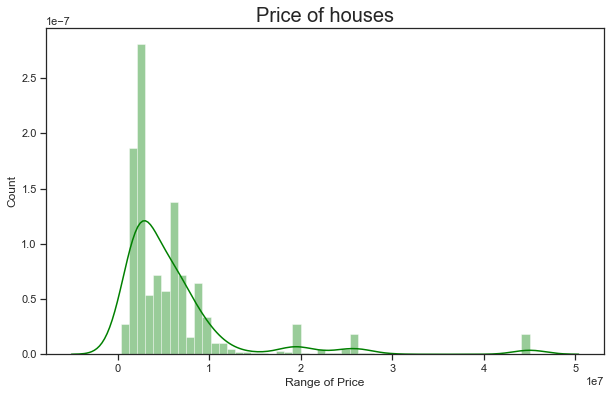

In [104]:
plt.figure(figsize=(10, 6))
sns.set(style = 'ticks')
sns.distplot(data['price'], color = "green")
plt.title('Price of houses', fontsize = 20)
plt.xlabel('Range of Price')
plt.ylabel('Count')

# Distribution of locations

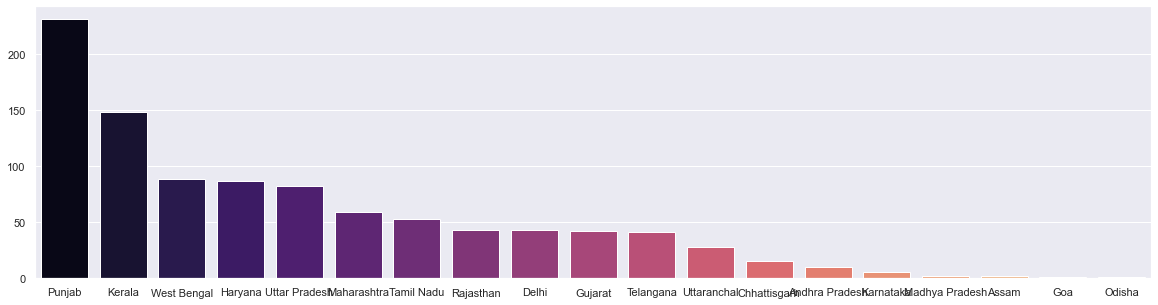

In [105]:
locations = data.location.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(20,5))
sns.barplot(x=locations.index, y=locations.values, color = 'g' , palette="magma")
plt.show()

# Distribution of Cities

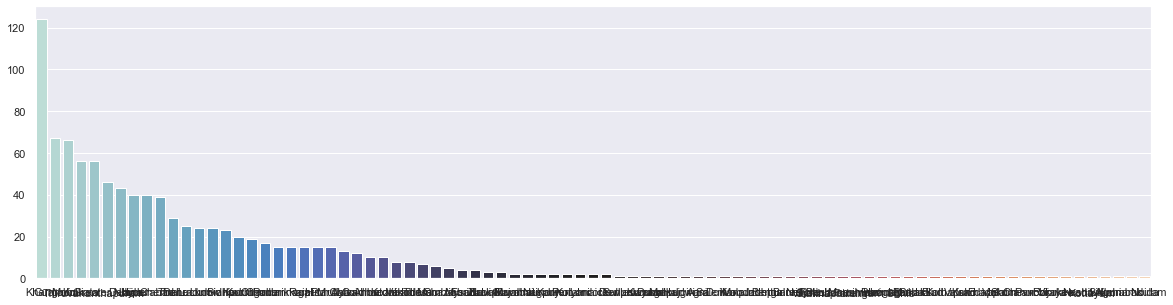

In [106]:
cities = data.City.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(20,5))
sns.barplot(x=cities.index, y=cities.values, color = 'g' , palette="icefire")
plt.show()

# Relationship between price and location

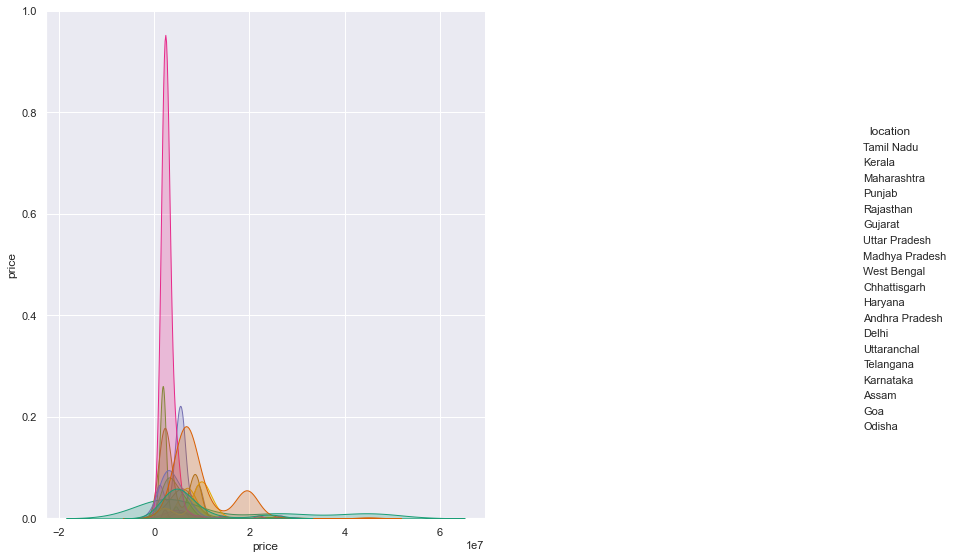

In [107]:
g = sns.pairplot(data, vars=["price"],  kind ="reg", hue = "location", palette="Dark2")
g.fig.set_size_inches(15,10)

# Relationship between price and cities

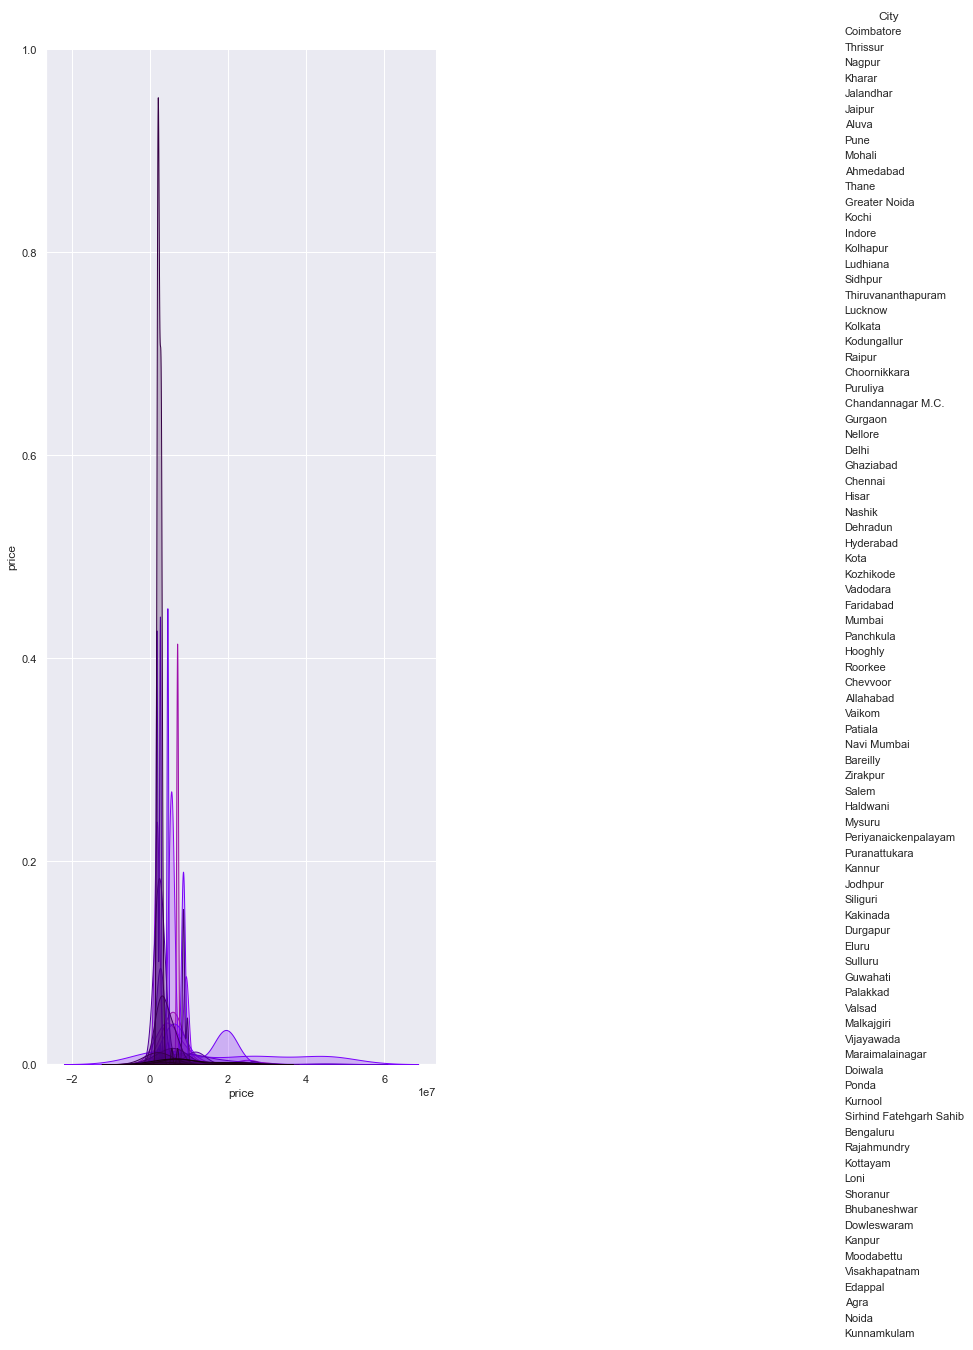

In [108]:
g = sns.pairplot(data, vars=["price"],  kind ="reg", hue = "City", palette="gnuplot")
g.fig.set_size_inches(15,20)

# Splitting the dataset to get the required features

In [129]:
df1 = data[['price','location']]
x=data[["price","location"]]
x.head()

,price,location
0,6401000,Tamil Nadu
1,8700000,Kerala
2,1500000,Maharashtra
3,2690000,Punjab
4,1780000,Punjab


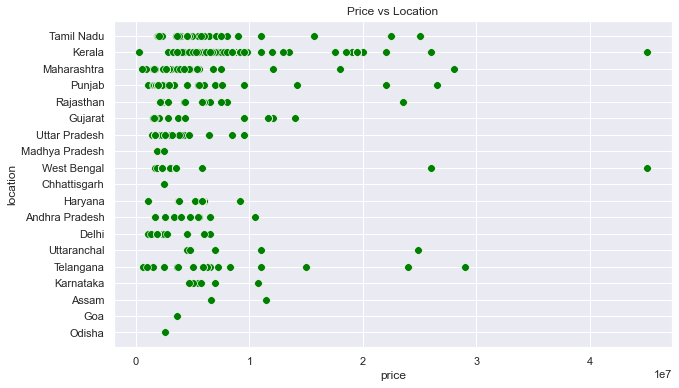

In [110]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'price',y = 'location',  data = x  ,s = 60, color = 'green' )
plt.xlabel('price')
plt.ylabel('location') 
plt.title('Price vs Location')
plt.show()

# Elbow curve to find the best value of k for clustering 

In [117]:
from kmodes.kprototypes import KPrototypes
#categorical_columns = data['location','City']
wcss1 = []
for i in range(5,15):
    kp=KPrototypes(n_clusters=i)
    kp.fit(x , categorical=[1])
    wcss1.append(kp.cost_)

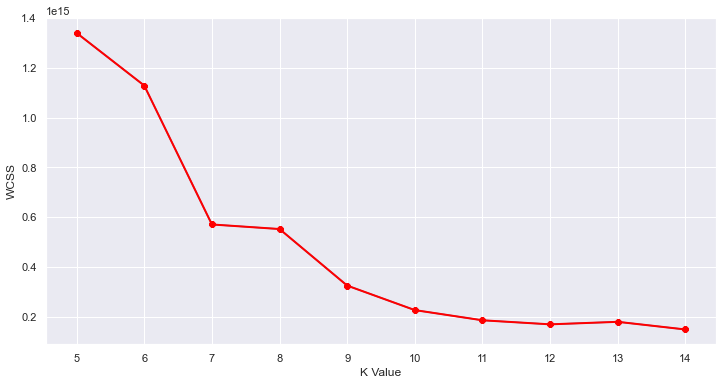

In [118]:
plt.figure(figsize=(12,6))
plt.plot(range(5,15),wcss1)
plt.plot(range(5,15),wcss1, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(5,15,1))
plt.ylabel("WCSS")
plt.show()

# Fit the data to train our model 

In [130]:
kp1=KPrototypes(n_clusters=9)
#Fitting the input data
kp1.fit(x , categorical=[1])
#predicting the labels of the input data
y=kp1.predict(x , categorical=[1])
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,price,location,label
0,6401000,Tamil Nadu,6
1,8700000,Kerala,0
2,1500000,Maharashtra,5
3,2690000,Punjab,4
4,1780000,Punjab,5


# Clustered data for price and location features

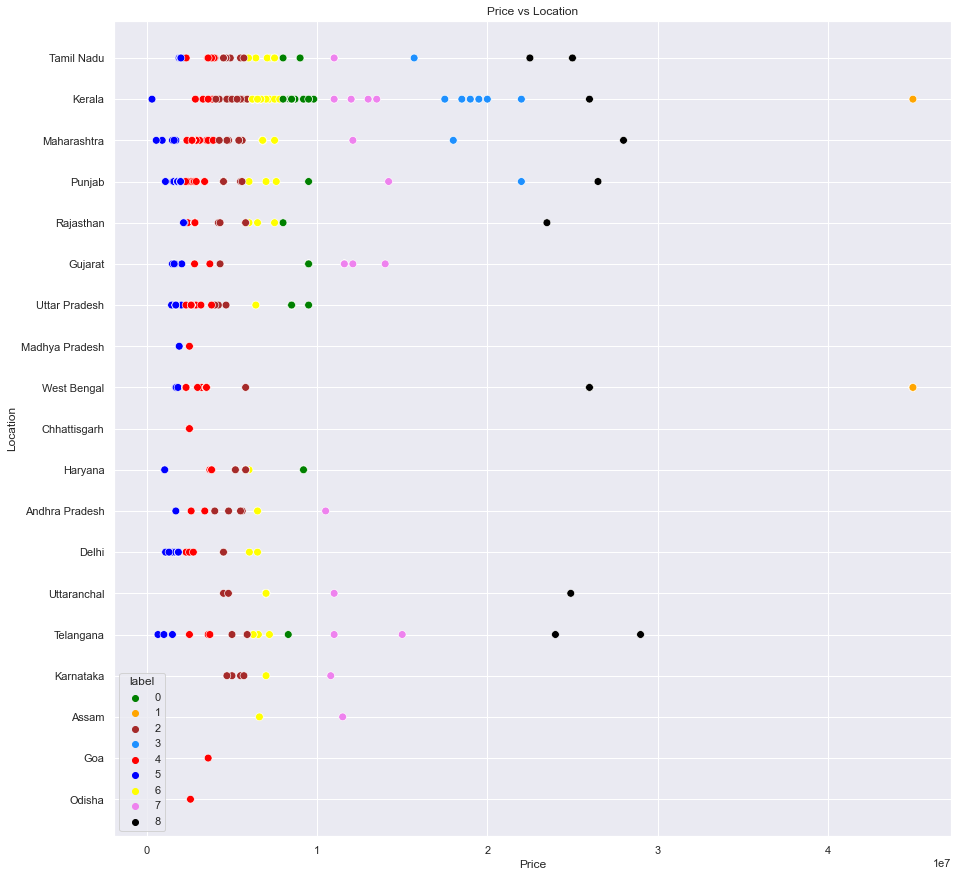

In [198]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = 'price',y = 'location',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red','blue','yellow','violet','black'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Price')
plt.ylabel('Location') 
plt.title('Price vs Location')
plt.show()

# elbow curve to find value of k based on price, location and city features

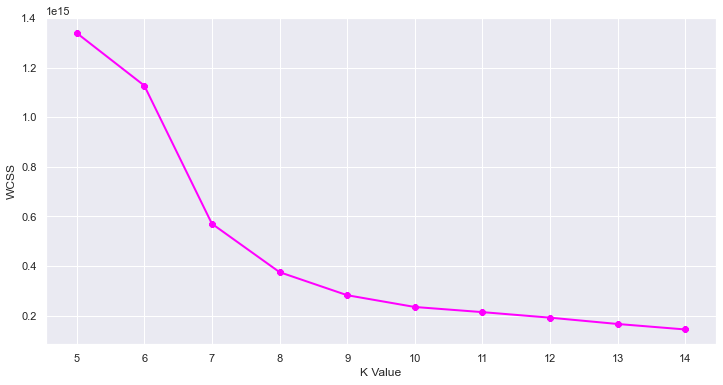

In [128]:
X2=data[["price","location","City"]]
wcss = []
for k in range(5,15):
    kp2 = KPrototypes(n_clusters=k)
    kp2.fit(X2 , categorical=[1,2])
    wcss.append(kp2.cost_)
plt.figure(figsize=(12,6))    
plt.plot(range(5,15),wcss, linewidth=2, color="magenta", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(5,15,1))
plt.ylabel("WCSS")
plt.show()

# fit the data to train our model based on k value

In [132]:
df2 = data[['price','location','City']]
kp2 = KPrototypes(n_clusters=8)
y2 = kp2.fit_predict(X2 , categorical=[1,2])
df2["label"] = y2
#The data with labels
df2.head()

,price,location,City,label
0,6401000,Tamil Nadu,Coimbatore,4
1,8700000,Kerala,Thrissur,1
2,1500000,Maharashtra,Nagpur,3
3,2690000,Punjab,Kharar,3
4,1780000,Punjab,Kharar,3


# Clusters based on price, city and location features

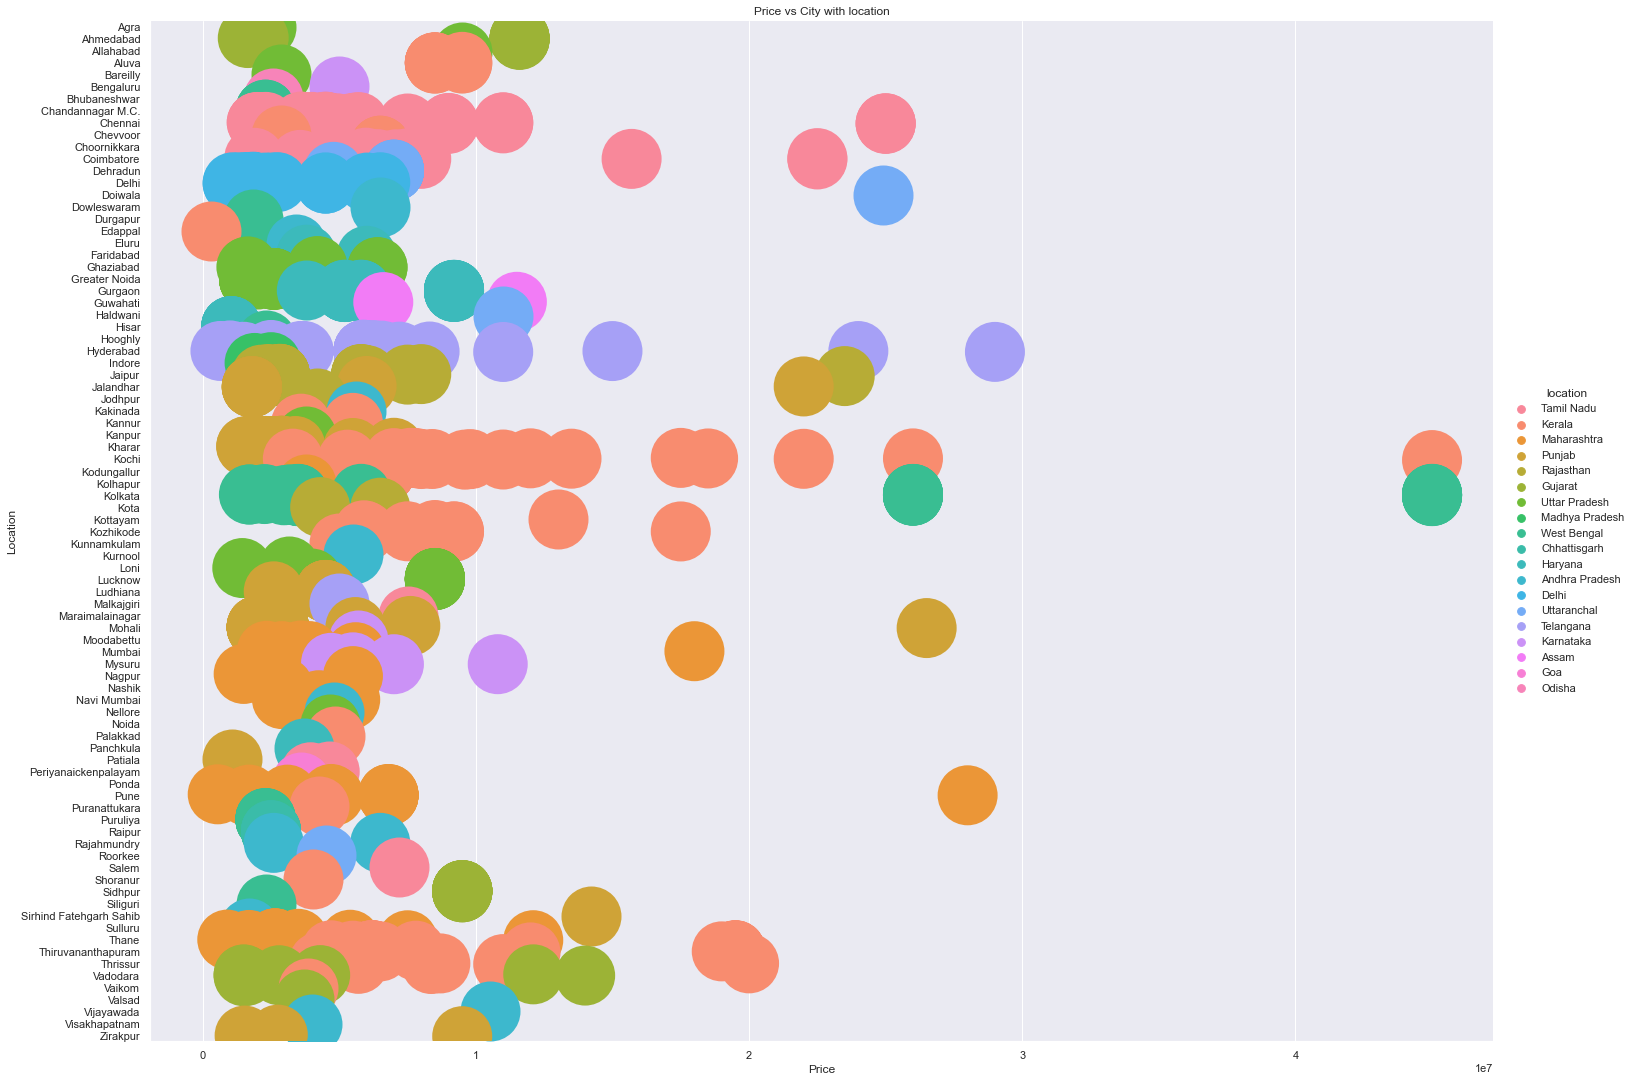

In [203]:
#plt.figure(figsize=(20,15))
sns.catplot(x ='price',y ='City',hue="location",  
            c=['green','orange','yellow','red','purple','violet','cyan','pink','black','beige','brown','gray','magenta','deepblue','deepred','deepyellow','deepcyan','deepbrown','deepmagenta'], 
            data = df2  ,s = 60 , height=15.00, aspect=11.7/8.27)
plt.xlabel('Price')
plt.ylabel('Location') 
plt.title('Price vs City with location')
plt.show()

# Output data of the clusters

In [210]:
cust1=df2[df2["label"]==0]
print('Number of houses in 1st cluster=', len(cust1))
print("--------------------------------------------")
cust2=df2[df2["label"]==1]
print('Number of houses in 2nd cluster=', len(cust2))
print("--------------------------------------------")
cust3=df2[df2["label"]==2]
print('Number of houses in 3rd cluster=', len(cust3))
print("--------------------------------------------")
cust4=df2[df2["label"]==3]
print('Number of houses in 4th cluster=', len(cust4))
print("--------------------------------------------")
cust5=df2[df2["label"]==4]
print('Number of houses in 5th cluster=', len(cust5))
print("--------------------------------------------")
cust6=df2[df2["label"]==5]
print('Number of houses in 6th cluster=', len(cust6))
print("--------------------------------------------")
cust7=df2[df2["label"]==6]
print('Number of houses in 7th cluster=', len(cust7))
print("--------------------------------------------")
cust8=df2[df2["label"]==7]
print('Number of houses in 8th cluster=', len(cust8))

Number of houses in 1st cluster= 27
--------------------------------------------
Number of houses in 2nd cluster= 91
--------------------------------------------
Number of houses in 3rd cluster= 27
--------------------------------------------
Number of houses in 4th cluster= 474
--------------------------------------------
Number of houses in 5th cluster= 128
--------------------------------------------
Number of houses in 6th cluster= 187
--------------------------------------------
Number of houses in 7th cluster= 33
--------------------------------------------
Number of houses in 8th cluster= 16
